### Bernouli Trials
#### It is an experiment having two outcomes(Success and Failure)

<img src='https://media.giphy.com/media/5EQC8eAnEAAZG/giphy.gif'>

#### Simulating Coin Flips for Hacker Statistics

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42) #assign seed value to 42 to generate pseudo random numbers

##### Lets experiment with Coin flips, where the success is getting heads in all 6 trials
##### For this lets draw a number between 0 & 1 and the threshold for getting heads is < 0.5 and getting tails >= 0.5

In [16]:
random_numbers = np.random.random(size = 6) #lets flip the coin 6 times and record the observations
print(random_numbers)

[ 0.37454012  0.95071431  0.73199394  0.59865848  0.15601864  0.15599452]


In [17]:
heads = random_numbers < 0.5
print(heads)

[ True False False False  True  True]


In [18]:
print("Out 6 trials , Heads occured : ",np.sum(heads),"times")

Out 6 trials , Heads occured :  3 times


#### Lets calculate the probability of getting all 6 heads by repeating the experimenting again and again
##### we can calculate this by number of times head appeared in all trials divided by total number of trials

In [19]:
n_all_heads = 0
for _ in range(10000):
    heads = np.random.random(size = 6) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 6:
        n_all_heads += 1
print("Probability of getting all 6 heads in a coin flipping is : ", n_all_heads/ 10000)

Probability of getting all 6 heads in a coin flipping is :  0.0143


##### Lets take another example where the mortagage loans are defaulted, say a bank made 100 mortagage loans and it wants to check out  the probability of all those 100 loans  turning out to be default and probability of getting defaulted is 0.05. Lets do this with Bernoulli trials

#### Experiment this (100 loans turning to be defaulted) 1000 times


In [20]:
def bernoulli_trials(n,p):
    """
    params n : number of bernoulli trials
    params p : probability of success
    """
    n_success = 0
    for i in range(n):
        random_number = np.random.random()
        if random_number < p:
            n_success += 1
    return n_success  

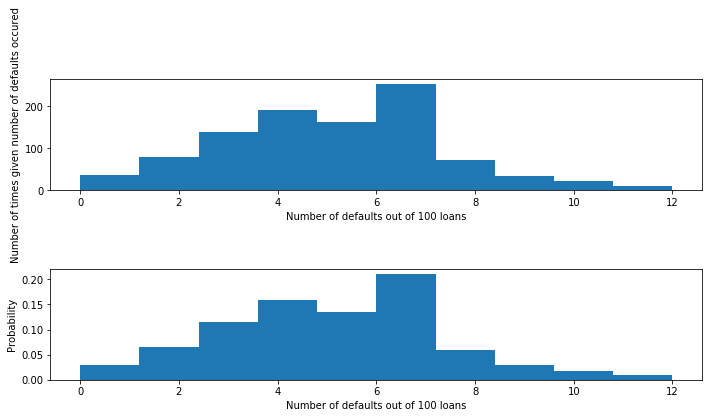

In [36]:
n_defaults = np.empty(1000)
for i in range(1000):
    n_defaults[i] = bernoulli_trials(100,0.05)
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)    
_ = plt.hist(n_defaults)
_ = plt.xlabel("Number of defaults out of 100 loans")
_ = plt.ylabel("Number of times given number of defaults occured")
plt.subplot(3,1,2)   
_ = plt.hist(n_defaults,normed=True)
_ = plt.xlabel("Number of defaults out of 100 loans")
_ = plt.ylabel("Probability")
plt.tight_layout()

#### Lets plot CDF of the mortagage loans getting defaulted

In [37]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

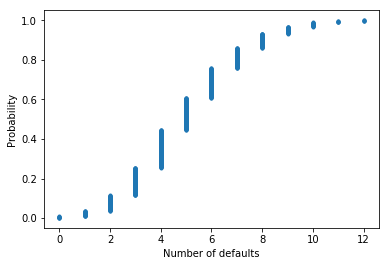

In [40]:
x,y = ecdf(n_defaults)
plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('Number of defaults')
_ = plt.ylabel('Probability')

#### Binomial Distribution
##### This is similar to the coin flipping done previously. It is the number 'r' of heads in 6 coin flips with probability of success(heads) 0.5 is Binomially distributed

##### coin flip experiment using np.random.binomial(num_of_trials , probability of success)


In [43]:
print(np.random.binomial(6,0.5),"heads in 6 flips")

3 heads in 6 flips


##### using size parameter this trial be repeated number of times
###### np.random.binomial(num_of_trials , probability of success, size = num_of_times to repeat the trial)

In [45]:
samples = np.random.binomial(60, 0.1, size=10000)


#### Binomial PMF
##### this can be plotted using histograms like plotted below

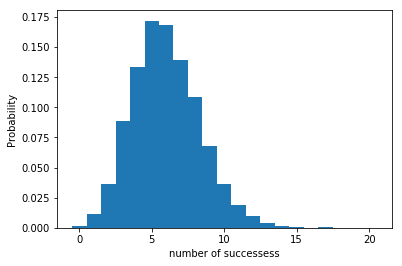

In [48]:
bins = np.arange(0, max(samples) + 1.5) - 0.5
_ = plt.hist(samples,normed=True,bins=bins)
_ = plt.xlabel("number of successess")
_ = plt.ylabel("Probability")

#### Binomial CDF
##### this can be plotted using ecdf funtion

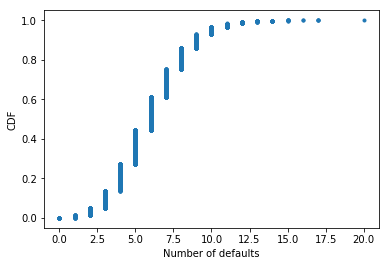

In [47]:
x,y = ecdf(samples)
plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('Number of defaults')
_ = plt.ylabel('CDF')